# Mask Covering Detection

**ECE 569A PROJECT REPORT**

Shu Han - V00972727

Zixuan(Sunny) Deng - V00971633

Liam Vu Nguyen - V00961931

In [ ]:
import pandas as pd # table operations
import numpy as np # linear algebra
# import seaborn as sns # visualizing
import os # getting path
from sklearn.utils import shuffle

import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img ,img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
testfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
trainfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
validationfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

# Keras Data Generator, Argumentation 

In [ ]:
# Configure Image Data Augmentation in Keras. Takes the path to a directory & generates batches of augmented data.

from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# this is the augmentation configuration we will use for expanding the training dataset, it could improve the performance. 
train_datagen = ImageDataGenerator(
        rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling to 0-1. 
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        trainfile,  # this is the target directory
        target_size=(128, 128),  # all images will be resized to 128x128
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        validationfile,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)



test_generator = test_datagen.flow_from_directory(
        testfile,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='binary',
        shuffle = False)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (4, 4)))

# To save train model time, decide to simplify the CNN model, so only use one ConV layer. 

# model.add(Conv2D(400, (3, 3), input_shape =(32,32,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

# model.add(Conv2D(500, (3, 3), input_shape =(32,32,3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# output = Dense(2,activation = 'softmax')


model.compile(loss = "binary_crossentropy", optimizer='Adam', metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
history = model.fit_generator(
        train_generator,
         steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator ,
         validation_steps=800 // batch_size)
# model.save_weights('first_try.h5') 

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
125/125 [==============================] - 24s 188ms/step - loss: 1.6401 - accuracy: 0.4578 - val_loss: 0.6842 - val_accuracy: 0.8138
Epoch 2/50
125/125 [==============================] - 19s 155ms/step - loss: 0.6545 - accuracy: 0.7809 - val_loss: 0.5412 - val_accuracy: 0.7575
Epoch 3/50
125/125 [==============================] - 18s 147ms/step - loss: 0.4925 - accuracy: 0.7997 - val_loss: 0.2219 - val_accuracy: 0.9287
Epoch 4/50
125/125 [==============================] - 17s 137ms/step - loss: 0.2286 - accuracy: 0.9167 - val_loss: 0.2099 - val_accuracy: 0.9275
Epoch 5/50
125/125 [==============================] - 18s 141ms/step - loss: 0.1923 - accuracy: 0.9242 - val_loss: 0.1738 - val_accuracy: 0.9362
Epoch 6/50
125/125 [==============================] - 17s 134ms/step - loss: 0.1386 - accuracy: 0.9488 - val_loss: 0.1180 - val_accuracy: 0.9588
Epoch 7/50
125/125 [==============================] - 17s 134ms/step - loss: 0.1016 - accuracy: 0.9604 - val_loss: 0.1454 - val_ac

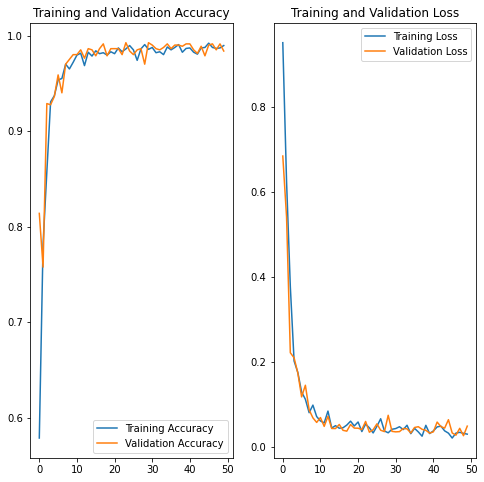

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=50

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
test_step = test_generator.n//test_generator.batch_size

# for evaluate_generator, it does require test_step. 
score = model.evaluate_generator(test_generator, steps=test_step)

print(score)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09056419879198074, 0.9737903475761414]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# predY=model.predict(test_generator, workers=1,max_queue_size=1) #, max_q_size=1
# y_pred = np.argmax(predY,axis=1)

# cause we use sigmoid, we need the threshopld. 
y_pred = (model.predict(test_generator) > 0.5).astype("int32")
#y_label= [labels[k] for k in y_pred]
y_actual = test_generator.classes
# confusion matrix
cm = confusion_matrix(y_actual, y_pred)
print(cm)

[[474   9]
 [ 17 492]]


In [ ]:
# report
labels = ['withMask', 'withoutMask']
print(classification_report(y_actual, y_pred, target_names=labels))

              precision    recall  f1-score   support

    withMask       0.97      0.98      0.97       483
 withoutMask       0.98      0.97      0.97       509

    accuracy                           0.97       992
   macro avg       0.97      0.97      0.97       992
weighted avg       0.97      0.97      0.97       992



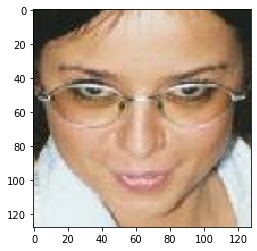

This image most likely belongs to Without Mask with a 73.11 percent confidence.


In [ ]:
# Visualize some prediction result. 


from tensorflow import keras
img_path =  '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test/WithoutMask/1163.png'
class_names = ['With Mask','Without Mask']

# img_path = "../input/face-demo/face_PNG5645.png"
img = keras.preprocessing.image.load_img(
    img_path, target_size=(128, 128))

plt.imshow(img)
plt.show()


img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
# predictions = model.predict(img_array)
# print(predictions)

#  (model.predict(test_generator) > 0.5).astype("int32")

predictions = (model.predict(img_array) > 0.5).astype("float64")
#y_label= [labels[k] for k in y_pred]
# y_actual = test_generator.classes
# score = tf.nn.softmax(predictions[0])
score = tf.nn.sigmoid(predictions[0])

# print(np.max(score))

# print(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[predictions[0][0].astype('int32')], 100 * np.max(score))
)

**Reference:**
Please note, as the code is use Keras API, I have looked at some demo code from Keras and Tensorflow official document. 


https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

https://keras.io/api/preprocessing/image/

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

https://www.tensorflow.org/tutorials/images/classification
